In [4]:
import pandas as pd
import numpy as np
import string
import warnings
import math
import nltk
import json
from langdetect import detect
from libsvm import *
from nltk.stem import PorterStemmer
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import display

from scipy.sparse import csr_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
import dask.dataframe as dd
import multiprocessing
import swifter
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('words')
from spellchecker import SpellChecker

spell = SpellChecker()

# pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anishajauhari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/anishajauhari/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [5]:
# pip install pyspellchecker

In [6]:
## Dataset Purification

In [7]:
# dataset = pd.read_csv("../../data/dataset_2.csv")
# drop_index = []
# for index, row in dataset.iterrows():
#     try:
#         if detect(row["lyrics"]) == "en":
#             continue
#         else:
#             drop_index.append(index)
#     except Exception as e:
#         pass
# dataset = dataset.drop(drop_index)
# dataset = dataset.loc[dataset["genre"]!="Not Available"]
# dataset["genre"].value_counts()

In [8]:
dataset = pd.read_csv("../../data/filtered_dataset.csv")

In [9]:
dataset["song"] = dataset["song"].apply(lambda x : str(x).replace("-"," "))
dataset["artist"] = dataset["artist"].apply(lambda x : str(x).replace("-"," "))

In [10]:
rock_pop_dataset = dataset.loc[(dataset["genre"] == "Pop") | (dataset["genre"] == "Rock")]
rock_pop_dataset["genre"].value_counts()
# rock_pop_dataset.to_csv("rockpopdataset.csv")

Rock    94386
Pop     31157
Name: genre, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='Genre', ylabel='No of songs'>

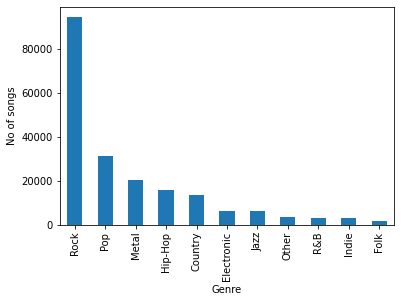

In [11]:
dataset["genre"].value_counts()
dataset["genre"].value_counts().plot(kind="bar", xlabel="Genre", ylabel="No of songs")

<AxesSubplot:xlabel='Genre', ylabel='No of songs'>

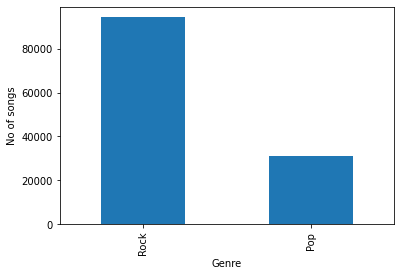

In [12]:
rock_pop_dataset['genre'].value_counts().plot(kind="bar", xlabel="Genre", ylabel="No of songs")

## Preprocessing

In [11]:
# rock_pop_dataset["genre"].value_counts()

In [12]:
ps = PorterStemmer()
stopwords = stopwords.words('english')
exclist = string.punctuation + string.digits
# remove punctuations and digits from lyrics
table_ = str.maketrans('', '', exclist)
rock_pop_dataset["filtered_lyrics"] = rock_pop_dataset["lyrics"].apply(lambda x : x.lower().translate(table_))
# stemming the lyrics
# rock_pop_dataset["filtered_lyrics"] = rock_pop_dataset["filtered_lyrics"].apply(lambda x: [ps.stem(y.lower()) for y in x.split(" ")])
# stopword removal 
rock_pop_dataset["filtered_lyrics"] = rock_pop_dataset["filtered_lyrics"].apply(lambda x : ' '.join( y for y in x.split(" ") if y not in stopwords))

In [13]:
# rock_pop_dataset.drop(columns = ["Unnamed: 0"])
target = rock_pop_dataset["genre"].astype('category').cat.codes
target.to_csv("../../data/target.csv")

In [14]:
rock_pop_dataset.to_csv("../../data/rockpopdataset.csv")